In [162]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import random

from scipy.optimize import linear_sum_assignment

In [326]:
IMG_WIDTH = 750
IMG_HEIGHT = 500
SAME_RECTANGLE_IOU_THRESHOLD = 0.8

class Rectangle(object):
    def __init__(self, x, y, w, h):
        self.x = x
        self.y = y
        self.w = w
        self.h = h
        self.color = 'r'
        
    def area(self):
        return self.w * self.h
    
        
def generate_random_rectangle(max_x, max_y) -> Rectangle:
    w = random.randint(50, max_x - 1)
    h = random.randint(50, max_y - 1)
    return Rectangle(
        x = random.randint(0, max_x - w),
        y = random.randint(0, max_y - h),
        w = w,
        h = h
    )


def draw_image_with_rectangles(rectangles):

    image = np.array(Image.open('husky.jpg'), dtype=np.uint8)

    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(image)

    # Create a Rectangle patch
    for r in rectangles:
        if r is None:
            continue
        rect = patches.Rectangle((r.x, r.y),r.w,r.h,linewidth=1,edgecolor=r.color,facecolor='none')
        ax.add_patch(rect)

    plt.show()
    

def generate_random_rectangles(n):
    return [generate_random_rectangle(IMG_WIDTH, IMG_HEIGHT) for _ in range(0, n)]


def iou(a: Rectangle, b: Rectangle):
    total_width = max(a.x + a.w, b.x + b.w) - min(a.x, b.x) + 1
    total_height = max(a.y + a.h, b.y + b.h) - min(a.y, b.y) + 1
    
    # calculate intersection
    intersection_width = total_width - (max(a.x + a.w, b.x + b.w) - min(a.x + a.w, b.x + b.w) + 1) - (max(a.x, b.x) - min(a.x, b.x) + 1) + 1
    intersection_height = total_height - (max(a.y + a.h, b.y + b.h) - min(a.y + a.h, b.y + b.h) + 1) - (max(a.y, b.y) - min(a.y, b.y) + 1) + 1
    intersection_area = max(0, intersection_width) * max(0, intersection_height)
    
    # calculate union
    union_area = a.area() + b.area() - intersection_area
    
    # iou
    return intersection_area / float(union_area)


def match_rectangles(set1, set2):
    cost = np.array([[(1.0-iou(r1, r2)) for r2 in set2] for r1 in set1])
    row_ind, col_ind = linear_sum_assignment(cost)
    for idx, r1 in enumerate(set1):
        
        # check if pair is a close enough match
        if (1.0-cost[idx][col_ind[idx]]) > SAME_RECTANGLE_IOU_THRESHOLD:
            yield (r1, set2[col_ind[idx]])
        else:
            yield (r1, None)
            yield (None, set2[col_ind[idx]])
        
    for idx, r2 in enumerate(set2):
        if idx not in col_ind:
            yield (None, r2)
        
        
def match_and_display(set1, set2):
    colors = np.tile(['b', 'r', 'w', 'c', 'm', 'y', 'k', 'g'], 10)
    
    # match rectangles and assign colors
    pairs = [p for p in match_rectangles(set1, set2)]
    for idx, p in enumerate(pairs):
        if p[0] is not None:
            p[0].color = colors[idx]
        if p[1] is not None:
            p[1].color = colors[idx]

    draw_image_with_rectangles([p[0] for p in pairs])
    draw_image_with_rectangles([p[1] for p in pairs])



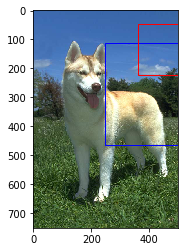

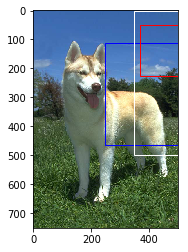

In [328]:

pix_diff = 5

a, b, e = generate_random_rectangles(3)
c, d = [a, Rectangle(b.x+pix_diff, b.y+pix_diff, b.w, b.h)]

match_and_display([a, b], [c, d, e])



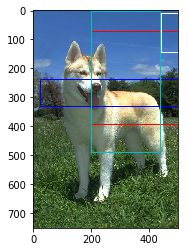

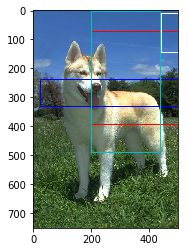

In [330]:
rects = generate_random_rectangles(5)
match_and_display(rects, rects)

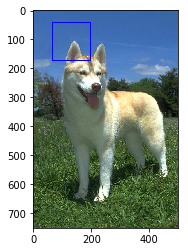

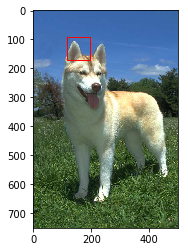

In [279]:
r = generate_random_rectangles(1)[0]
pix_diff = 50
match_and_display([r], [Rectangle(r.x+pix_diff, r.y+pix_diff, r.w-pix_diff, r.h-pix_diff)])

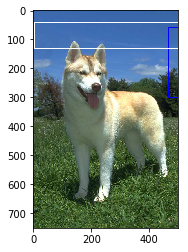

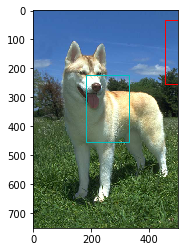

In [325]:
match_and_display(generate_random_rectangles(2), generate_random_rectangles(2))

In [255]:
np.tile([1,2,3], 3)

array([1, 2, 3, 1, 2, 3, 1, 2, 3])